In [2]:
import altair as alt
import pandas as pd
from altair import datum

from pyprojroot import here

from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize as viz

df = get_processed_dataset("austria_gkz")

In [3]:
alt.Chart(df).transform_window(
    rank='rank(Incidence)',
    sort=[alt.SortField('Incidence', order='descending')]
).transform_filter(
    alt.datum.rank < 20
).mark_bar().encode(
    x='Incidence:Q',
    y=alt.Y('Bezirk:N', sort='-x'),
    color=alt.Color('Bundesland:N')
).properties(
    height=600,
    width=800,
    title='Totale casi per 1M pop per provincia - Media ultimi 7 giorni'
)

alt.Chart(...)

In [4]:
alt.Chart(df[df.BundeslandID == 2]).transform_window(
    rank='rank(Incidence)',
    sort=[alt.SortField('Incidence', order='descending')]
).transform_filter(
    alt.datum.rank < 20
).mark_bar().encode(
    x='Incidence:Q',
    y=alt.Y('Bezirk:N', sort='-x'),
).properties(
    height=600,
    width=800,
    title='Totale casi per 1M pop per provincia in Carinzia - Media ultimi 7 giorni'
)

alt.Chart(...)

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
austria = gpd.read_file('../../data/raw/bezirke_999_geo.json').to_crs("EPSG:32633")
austria['iso'] = austria.iso.astype(int)
merged = pd.merge(austria, df, left_on='iso', right_on='GKZ')

C:\Users\agostine\Anaconda3\envs\coronavirus\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


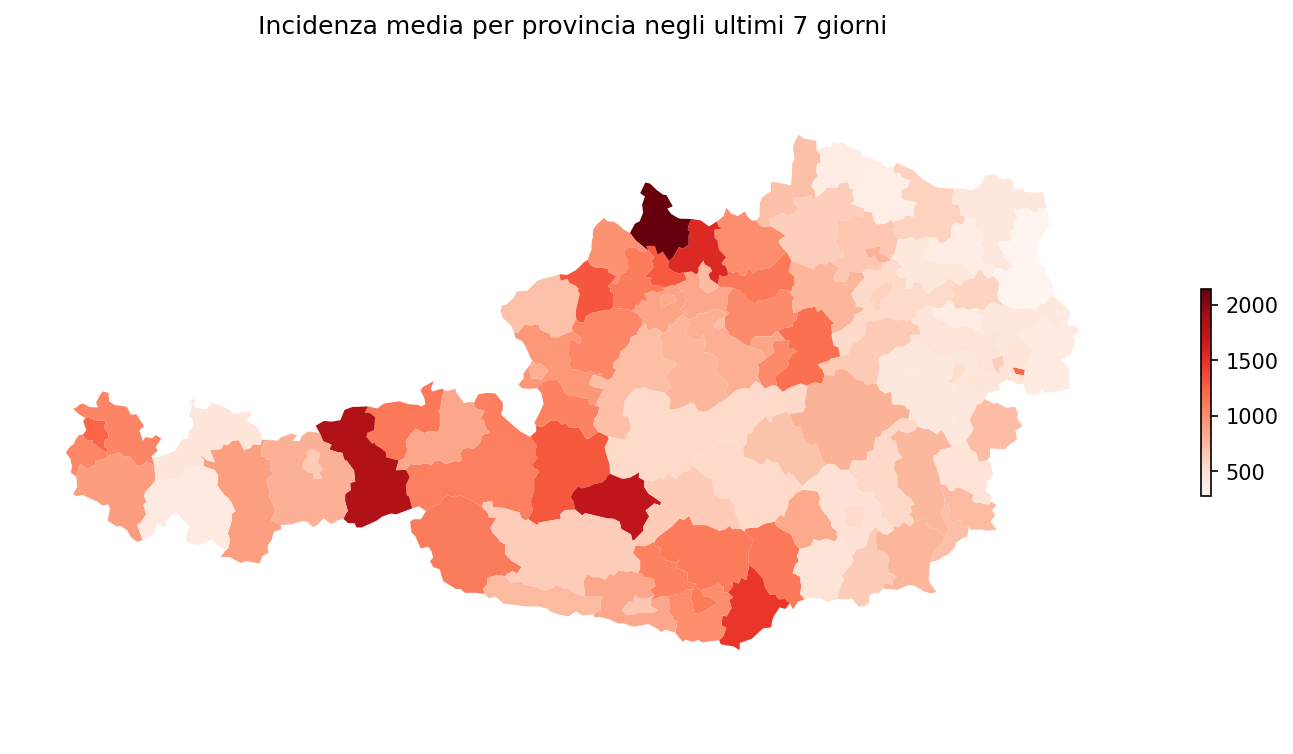

In [6]:
f, ax = plt.subplots(1, figsize=(12,6))
merged.plot(column='Incidence', ax=ax, cmap='Reds', legend=True, legend_kwds={'shrink': 0.3})
ax.set_axis_off()
plt.axis('equal')
plt.title('Incidenza media per provincia negli ultimi 7 giorni')
plt.show()